In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df.shape

(1599, 12)

<AxesSubplot:>

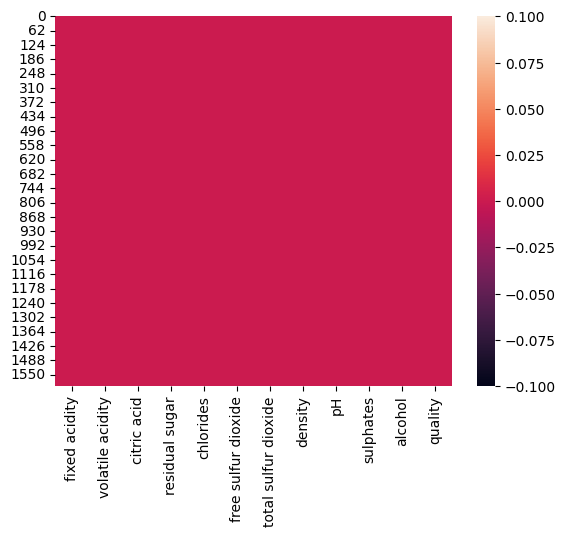

In [8]:
sns.heatmap(df.isnull())

In [14]:
df = df.drop_duplicates()

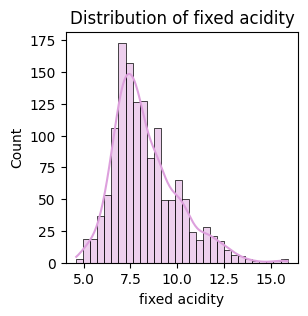

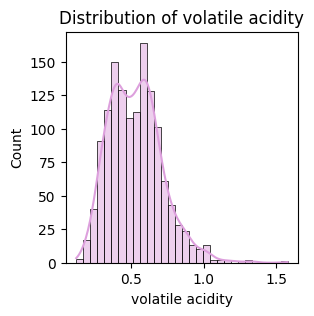

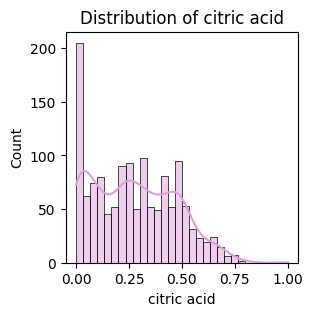

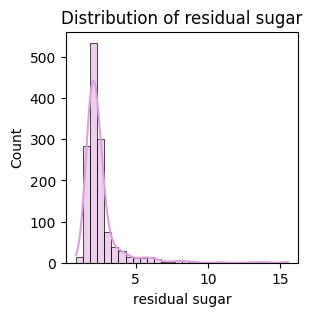

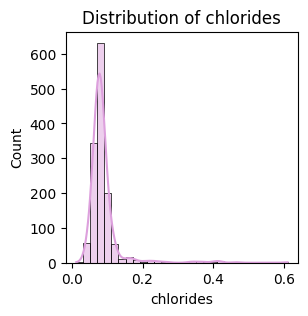

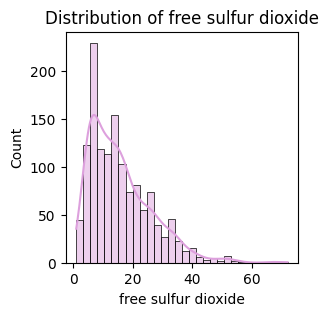

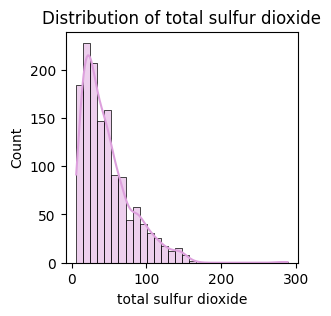

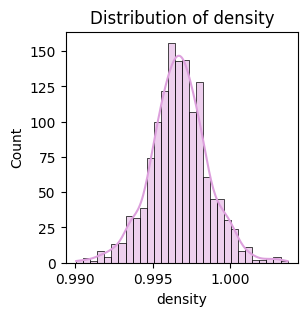

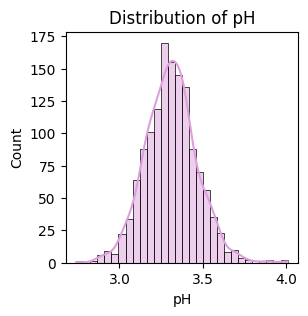

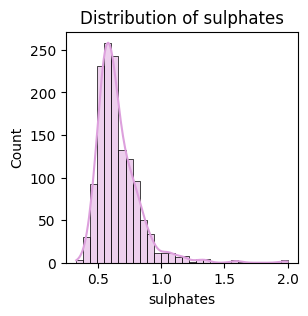

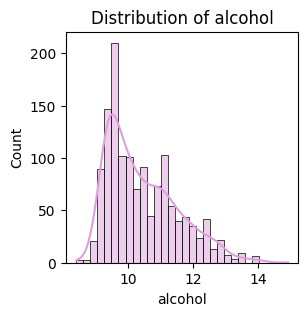

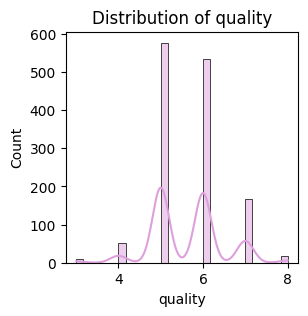

In [21]:
# <!-- for i in (df.columns[:-1]): -->
# plt.figure(figsize = (8,5))
# sns.histplot(data = df, x = 'fixed acidity', y = 'quality',kde = True)
# plt.show()
for column in df:
    plt.figure(figsize=(3, 3))
    sns.histplot(data=df, x=column, kde=True, bins=30, color='#DDA0DD')
    plt.title(f'Distribution of {column}')
    plt.show()

Comparing each attribute with 'quality'

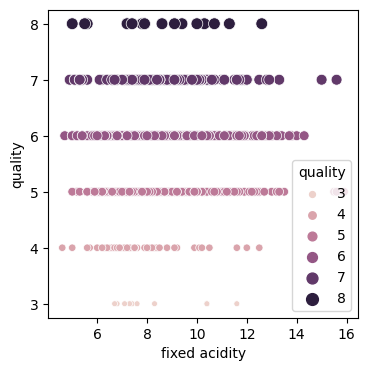

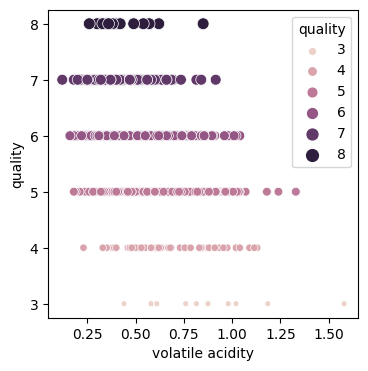

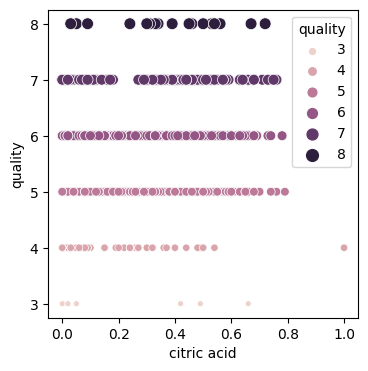

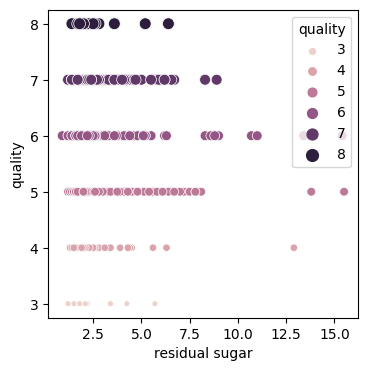

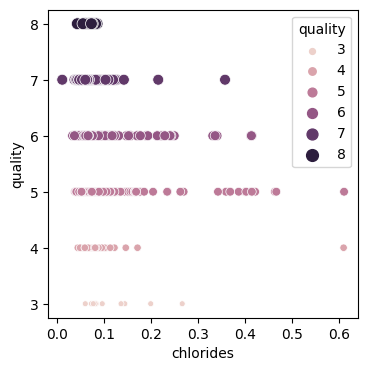

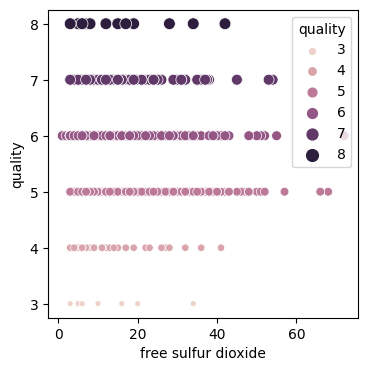

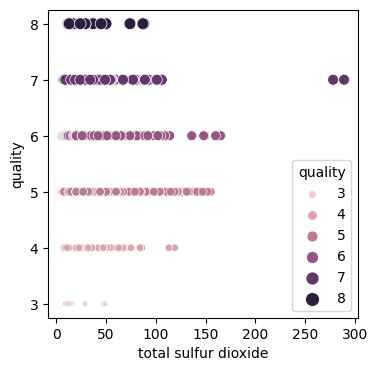

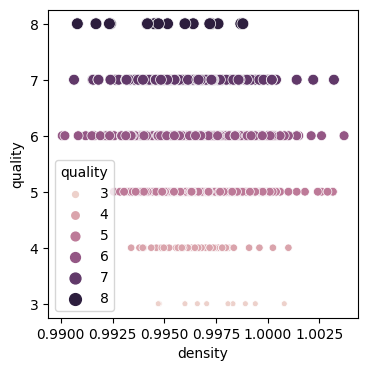

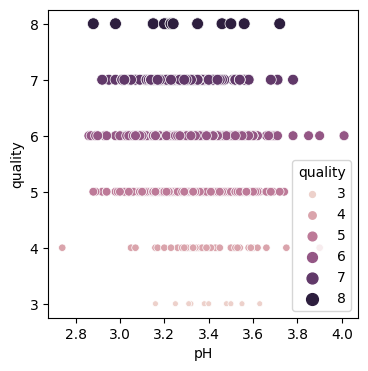

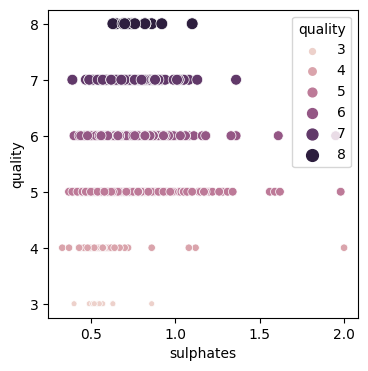

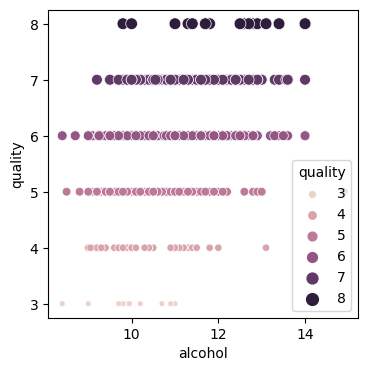

In [24]:
for column in df.columns[:-1]:
    plt.figure(figsize = (4,4))
    sns.scatterplot(data = df, x = column, y = 'quality', hue = 'quality', size = 'quality')
    plt.show()

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


Do sweeter wines receive better ratings?

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

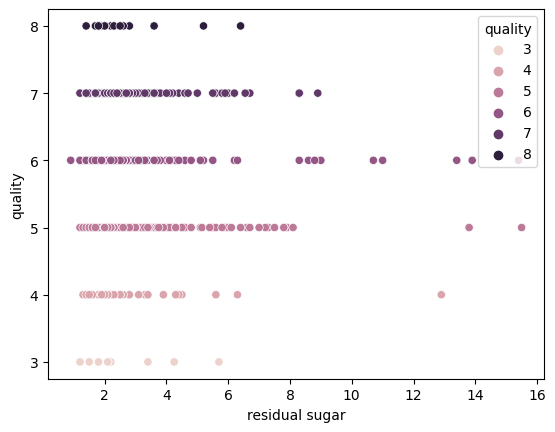

In [50]:
# df.plot(x = 'residual sugar', y = 'quality', kind='scatter', hue)
sns.scatterplot(data=df, x = 'residual sugar', y = 'quality',hue='quality')

Average quality of wines with low sugar 5.624489795918367
Average quality of wines with high sugar 5.620052770448549


<BarContainer object of 2 artists>

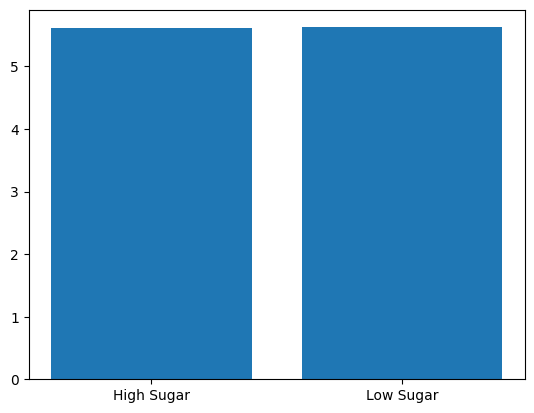

In [53]:
mean_sugar = df['residual sugar'].mean()
meanofhighsugar = df[df['residual sugar'] > mean_sugar].quality.mean()
meanoflowsugar = df[df['residual sugar'] < mean_sugar].quality.mean()

print("Average quality of wines with low sugar", meanoflowsugar)
print("Average quality of wines with high sugar", meanofhighsugar)

plt.bar(x = ['High Sugar', 'Low Sugar'], height = [meanofhighsugar, meanoflowsugar])

There is a close competition between sweet and less sweet wines, but wines with 'low residual sugar' wins

What level of acidity receives the highest average rating?


Average quality of wines with low acidity 5.541463414634146
Average quality of wines with high acidity 5.747680890538033


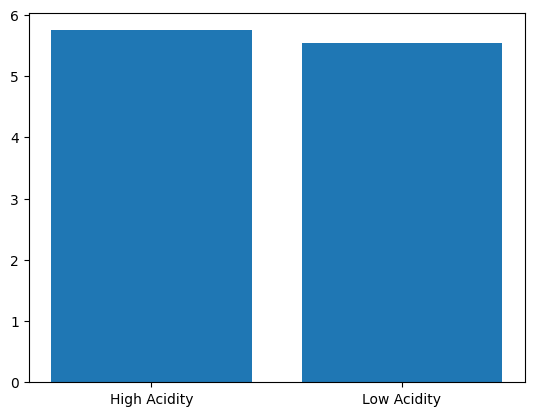

In [60]:
mean_acidity = df['fixed acidity'].mean()
meanofhighalc = df[df['fixed acidity'] > mean_acidity].quality.mean()
meanoflowalc = df[df['fixed acidity'] < mean_acidity].quality.mean()

print("Average quality of wines with low acidity", meanoflowalc)
print("Average quality of wines with high acidity", meanofhighalc)

plt.bar(x = ['High Acidity', 'Low Acidity'], height = [meanofhighalc, meanoflowalc])
plt.show()

Wines with a slight more acidity tend to have better rating

Which wines are produced more? (according to quality)

<AxesSubplot:xlabel='Quality', ylabel='quantity'>

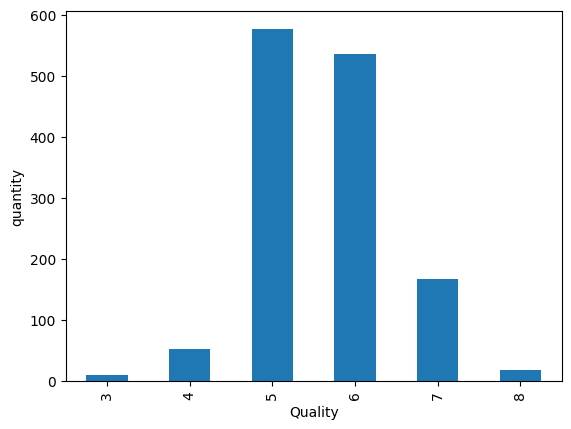

In [68]:
df['quality'].value_counts().sort_index().plot(kind='bar', xlabel='Quality', ylabel='quantity')

1225

Model Creation and Training